# Loading Data

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
dfx = pd.read_csv("C:/Users/Abhishek Singh/Desktop/ML/Data_Science/Datasets/Locally weighted regression/weightedX.csv")
dfy = pd.read_csv("C:/Users/Abhishek Singh/Desktop/ML/Data_Science/Datasets/Locally weighted regression/weightedY.csv")

X = dfx.values
Y = dfx.values

print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


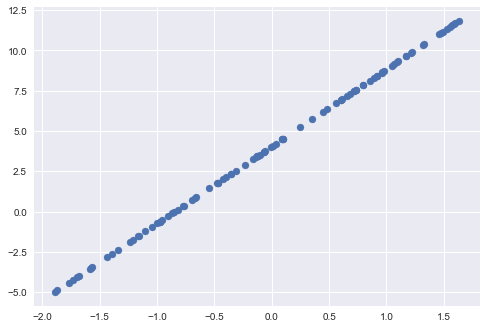

In [36]:
#noramalise
u = X.mean()
std = X.std()
X = (X-u)/std


plt.scatter(X,Y)
plt.show()

# finding w(mxm diagonal matrix)

In [37]:
def getW(query_point,X,tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    x = query_point
    
    for i in range(m):
        W[i,i] = np.exp(np.dot((X[i]-x),(X[i]-x).T)/-2*tau*tau)
        
    return W

In [53]:
X = np.mat(X)
Y = np.mat(Y)
m = X.shape[0]


# Make predictions

In [56]:
def predict(X,Y,query_point,tau):
    ones = np.ones((m,1))
    X_ = np.hstack((X,ones))
    
    #print(X_.shape)
    qx = np.mat([query_point,1])
    
    W = getW(qx,X_,tau)
    
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    
    pred = np.dot(qx,theta)
    
    return theta,pred
    

In [60]:
theta,pred = predict(X,Y,1,1)
print(pred)

[[8.82128025]]
